# Chapter 4. 신경망 학습

신경망 학습의 학습이란 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것을 뜻한다. 이번 챕터에서는 신경망이 학습할 수 있도록 해 주는 지표인 손실 함수를 소개하는데, 이 손실 함수의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습의 목표이다. 이 값을 가급적 작게 만드는 기법으로, 함수의 기울기를 활용하는 경사법을 소개한다.

## 4.1 데이터에서 학습한다!

신경망의 특징은 데이터를 보고 학습할 수 있다는 점인데, 이는 즉 가중치 매개변수의 값을 데이터를 보고 자동으로 결정한다는 뜻이다. 앞서 퍼셉트론 예에서는 진리표를 보며 수작업으로 매개변수 값을 설정했지만, 실제 신경망에서는 매개변수는 수천에서 수만 이상이다. 수작업으로 매개변수를 정하는 건 사실상 불가능에 가깝다.

이번 챕터에서는 신경망 학습(데이터로부터 매개변수의 값을 정하는 방법)에 대해 설명하고 파이썬으로 MNIST 데이터셋의 손글씨 숫자를 학습하는 코드를 구현해 본다.


> 데이터로부터 자동으로 학습 가능한 경우

*퍼셉트론도 직선으로 분리할 수 있는(선형 분리 가능) 문제라면 자동으로 학습이 가능하다. 이 문제는 유한 번의 학습을 통해 풀수 있다는 사실이 퍼셉트론 수렴 정리(perceptron convergence theorem)로 증명되었다. 하지만 비선형 문제는 자동으로 학습할 수 없다.*

### 4.1.1 데이터 주도 학습

보통 패턴을 찾아내야 할 때는 사람의 경험과 직관을 단서로 시행착오를 거듭하지만, 기계학습에서는 사람의 개입을 배제하고 수집한 데이터로부터 패턴을 찾으려 시도한다.

하지만 예시로 이미지에서'5'라는 숫자를 인식하는 프로그램을 구현할 경우 이를 직접 고안해 설계하기란 의외로 어려운 문제임을 알 수 있다. 사람이라면 어렵지 않게 인식하지만, 그 안의 숨은 규칙성을 명확한 로직으로 풀기가 어렵다.

그렇기에 '5'를 인식하는 알고리즘을 밑바닥부터 '설계하는' 대신, 주어진 데이터를 잘 활용해 해결하고 싶을 것이다. 이에 대한 방법의 하나로, 이미지에서 특징(feature)을 추출하고 그 특징의 패턴을 기계학습 기술로 학습하는 방법이 있다.

특징이란 입력 데이터(입력 이미지)에서 본질적인 중요한 데이터를 정확하게 추출할 수 있도록 설계된 변환기를 가리키는데, 보통 이미지의 특징은 벡터로 기술한다. 이 변환된 벡터를 가지고 지도 학습 방식의 대표 분류 기법인 SVM, KNN 등으로 학습할 수 있다.

이와 같은 기계학습에서는 모아진 데이터로부터 규칙을 찾아내는 역할을 '기계'가 담당하여 사람의 부담을 덜어준다.* 다만, 이미지를 벡터로 변환할 때 사용하는 특징은 여전히 '사람'이 설계하는 것임을 주의해야 한다. 이는 즉 문제에 적합한 특징을 쓰지 않으면(혹은 특징을 설계하지 않으면) 좀처럼 좋은 결과를 얻을 수 없다는 뜻이다.*

이처럼 기계학습의 두 가지 접근법을 언급했는데, 이를 그림으로 나타내면 다음과 같다. 반면 신경망(딥러닝) 방식은 사람이 개입하지 않는 블록 하나로 그려진다.

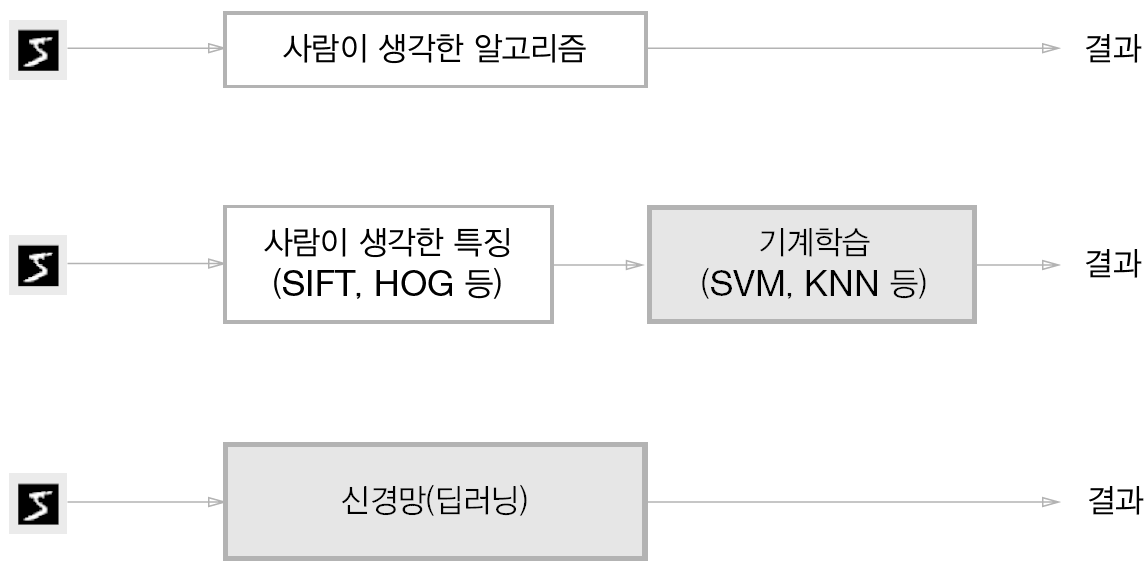

위와 같이 신경망은 이미지를 '있는 그대로' 학습한다. 두 번째 접근 방식(특징과 기계학습 방식)에서는 특징을 사람이 설계했지만, 신경망은 이미지에 포함된 중요한 특징까지도 '기계'가 스스로 학습할 것.

즉, 신경망은 모든 문제를 같은 맥락에서 풀 수 있다는 이점이 있다. 어떤 문제든 관계없이 신경망은 주어진 데이터를 온전히 학습하고, 주어진 문제의 패턴을 발견하려 시도한다. 즉, 신경망은 모든 문제를 주어진 데이터 그대로를 입력 데이터로 활용해 'end-to-end'로 학습이 가능하다.

> 종단간 기계학습 (end-to-end maching learning)

딥러닝의 또 다른 단어. 처음부터 끝까지, 즉 데이터(입력)에서 목표한 결과(출력)를 사람의 개입 없이 얻는다는 뜻을 담고 있다.

### 4.1.2 훈련 데이터와 시험 데이터

기계학습 문제는 데이터를 나눠 학습과 실험을 수행한다.
- 훈련 데이터 (training data): 학습하며 최적의 매개변수를 찾는다.
- 시험 데이터 (test data) : 훈련한 모델의 실력을 평가한다.

이를 나누어야 하는 이유는 무엇일까?

=> 우리가 원하는 것은 범용적으로 사용할 수 있는 모델이므로, 범용 능력을 제대로 평가하기 위한 분리다.

> 범용 능력이란?

아직 보지 못한 데이터(훈련 데이터에 포함되지 않는 데이터)로도 문제를 올바르게 풀어내는 능력이며 이것이 기계학습의 최종 목표이다. 예를 들어 수중에 있는 훈련 데이터만 잘 판별한다면 그 데이터에 포함된 사람의 글씨체만 학습했을 가능성이 크므로, 즉 최종 목표는 '특정인의 특정 글자'가 아닌 '임의의 사람의 임의의 글자'이다.

따라서 데이터셋 하나로만 매개변수의 학습과 평가를 수행하면 올바른 평가가 될 수 없다. 한 데이터셋에 대해서만 지나치게 최적화된 상태를 **오버피팅(overfitting)**이라 하며, 이를 피하는 것이 기계학습의 중요한 과제이기도 하다.

## 4.2 손실 함수

신경망 학습에서는 현재의 상태를 '하나의 지표'로 표현하며 그 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색한다. 이 학습에서 사용하는 지표는 **손실 함수(loss function)**라 하며, 이는 임의의 함수를 사용할 수도 있지만 일반적으로는 오차제곱합과 교차 엔트로피 오차를 사용한다.

참고로, 손실 함수는 신경망의 '나쁨'을 나타내는 지표로, 현재의 신경망이 훈련 데이터를 얼마나 잘 처리하지 '못'하느냐를 나타낸다. 성능의 '나쁨'과 '좋음' 중 어느 쪽을 지표로 삼아도 본질적으로 수행하는 일은 다르지 않다.

### 4.2.1 오차제곱합 (sum of squares for error, SSE)

- $y_k$: 신경망의 출력(신경망이 추정한 값)
- $t_k$: 정답 레이블
- $k$: 데이터 차원 수

각 원소의 출력(추정 값)과 정답 레이블(참 값)의 차($y_k - t_k$)를 제곱한 후, 그 총합을 구한다.

$$
E = \frac{1}{2} \sum_{k} (y_k - t_k)^2
$$


In [ ]:
# 3.6 손글씨 숫자 인식에서의 예시 (0~9 레이블(숫자)은 [0]~[9] 인덱스)
# y: 이미지가 '0' 레이블일 확률은 0.1, '1'일 확률은 0.05... 이런 식으로 해석
# t는 정답을 가리키는 위치의 원소는 1로, 그 외에는 0으로 표기. 즉 [2]에 해당하는 원소 값이 1이므로 정답이 '2'

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] # 소프트맥스 함수의 출력 (확률)
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0] # 정답 레이블 (y에서 0.6이라는 확률이 제일 높음)

이처럼 한 원소만 1로 하고 그 외는 0으로 나타내는 표기법을 **원-핫 인코딩**이라 한다.

In [ ]:
# 오차제곱합 구현

def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [ ]:
# 예1: '2'일 확률이 가장 높다고 추정함 (0.6)
sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [ ]:
# 예2: '7'일 확률이 가장 높다고 추정함 (0.6)
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

0.5975

위와 같이 두 가지 예에서의 정답은 똑같이 '2'이지만 신경망의 출력이 높은 인덱스가 다르다. (즉, y 확률은 달라지지만 t는 동일) 실험의 결과로 첫 번째 예의 손실 함수 쪽 출력이 작으며 정답 레이블과의 오차도 작은 것을 알 수 있다. 즉, 오차제곱합 기준으로는 첫 번째 추정 결과가 (오차가 더 작으니) 정답에 더 가까울 것으로 판단할 수 있다.

### 4.2.2 교차 엔트로피 오차 (cross entropy error, CEE)

- $log$: 밑이 $e$인 자연로그($log_e$)
- $y_k$: 신경망의 출력 (모델의 예측값을 말함.)
- $t_k$: 정답 레이블. 원-핫 인코딩된 벡터로, 특정 클래스 $k$에 대해서만 1이고 나머지는 0

즉, 실질적으로 정답일 때의 추정($t_k$가 1일 때의 $y_k$)의 자연로그를 계산하는 식 (정답일 때의 출력이 전체 값을 정함)

=> 모델의 예측 $y_k$와 실제 정답 $t_k$ 사이의 차이를 측정하는 지표. 모델이 예측한 확률이 정답에 가까울수록 손실 값이 작아진다.

$$
E = - \sum_{k=1}^{i} t_k \log_e y_k
$$


아래는 자연로그의 그래프 ($y=logx$) 이다.
- $x$가 1일 때 $y$는 0
- $x$가 0에 가까워질수록 $y$의 값은 점점 작아짐

즉 정답에 해당하는 출력이 커질수록 0에 다가가다가, 그 출력이 1일 때 0이 된다. 반대로 정답일 때의 출력이 작아질수록 오차는 커진다.

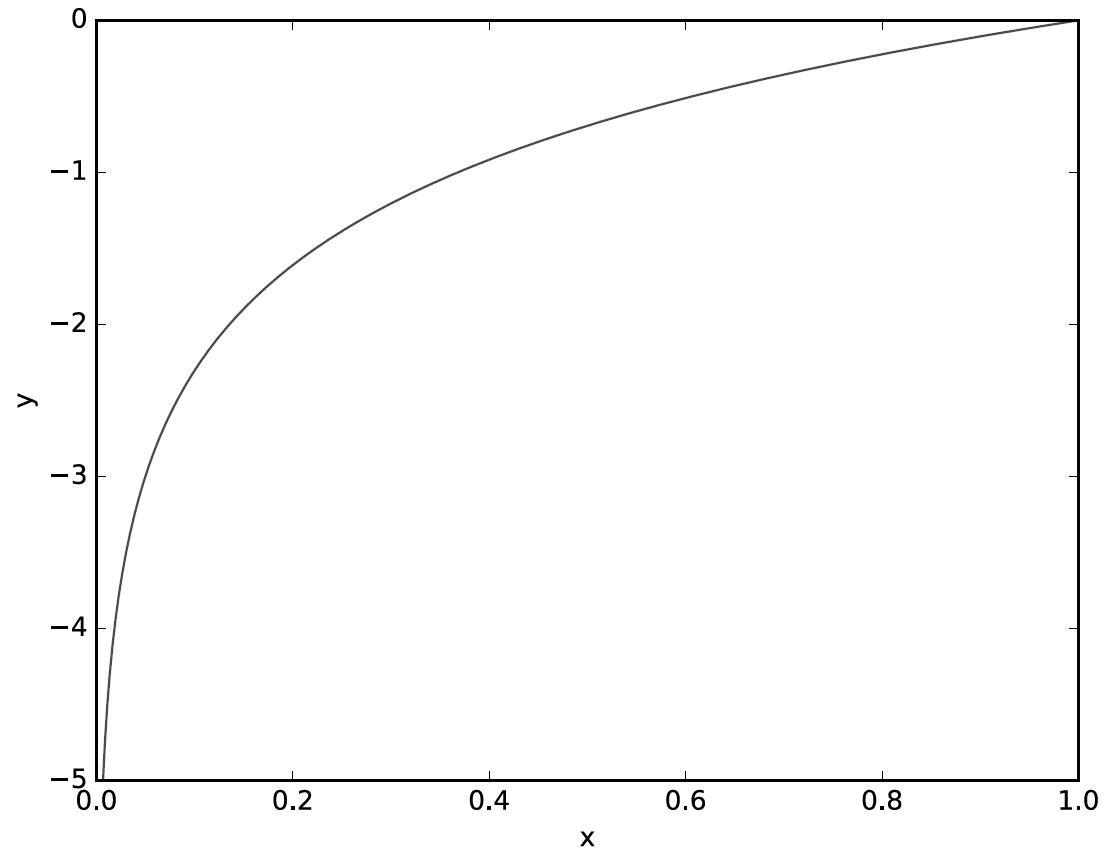

In [ ]:
# 교차 엔트로피 오차 구현

def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

y와 t는 넘파이 배열이다. 하지만 np.log 계산 시 아주 작은 값인 delta를 더했는데, 이는 np.log() 함수에 0을 입력하면 마이너스 무한대를 뜻하는 -inf가 되어 더는 계산을 진행할 수 없기 때문이다.

In [ ]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [ ]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

첫 번째 예의 교차 엔트로피 오차가 훨씬 낮다. 즉, 결과(오차 값)가 더 작은 첫 번째 추정이 정답일 가능성이 높다고 판단한 것으로, 앞서 오차제곱합의 판단과 일치한다는 것을 볼 수 있다.

### 4.2.3 미니배치 학습
- 기계학습 문제는 훈련 데이터에 대한 손실 함수의 값을 구하고, 그 값을 최대한 줄여주는 매개변수를 찾아내는 과정을 통해 학습이 이루어진다. 이를 위해 모든 훈련 데이터를 사용해 손실 함수 값을 계산하고, 그 값들의 합을 지표로 삼아 최적의 매개변수를 찾는 것이 목표다.

예를 들어, 교차 엔트로피 오차는 다음과 같다.

$$
E = -\frac{1}{N} \sum_{n} \sum_{k} t_{nk} \log y_{nk}
$$

- $N$: 데이터 개수
- $t_{nk}$: n번째 데이터의 k번째 값 ($y_{nk}$는 신경망의 출력, $t_{nk}$는 정답 레이블)
- 즉, 데이터 하나에 대한 손실 함수를 N개의 데이터로 확장한 것.

위를 도출하기 위한 과정은

1. 원래의 교차 엔트로피 손실 함수는 다음과 같음. (단일 데이터에 대한 손실 함수)
$$
E = - \sum_{k=1}^{i} t_k \log_e y_k
$$

2. 먼저, 데이터 $n$번째에 대한 손실 함수는 다음과 같음. (n을 그냥 곱함)
$$
E = - \sum_{k} t_{nk} \log_e y_{nk}
$$

3. 이후, 모든 훈련 데이터 $N$에 대해 위의 식을 합산하면 다음과 같음.
$$
\sum_{n=1}^NE_n = -\sum_{n=1}^N \sum_{k} t_{nk} \log y_{nk}
$$

4. 그런데, 모든 데이터에 대해 **손실 함수의 평균**을 구하려면, 합산한 손실 함수를 데이터 개수 $N$으로 나누어야 함. => '**정규화**'
$$
E = -\frac{1}{N} \sum_{n=1}^NE_n
$$

  이를 풀어서 쓰면:
$$
E = \frac{1}{N}(-\sum_{n=1}^N \sum_{k} t_{nk} \log y_{nk})
$$

  따라서 최종적으로 다음과 같이 표현됨.
$$
E = -\frac{1}{N} \sum_{n} \sum_{k} t_{nk} \log y_{nk}
$$



위와 같이 평균 솔실 함수를 구하면 훈련 데이터 개수와 관계없이 언제든 통일된 지표를 얻을 수 있지만, 훈련 데이터가 많아진다면 이 많은 데이터를 대상으로 일일이 손실 함수를 계산하는 것은 현실적이지 않다. 이런 경우, 모든 데이터를 사용하는 대신, 데이터 일부를 추려 손실 함수를 계산하면 전체 데이터의 '근사치'로 이용할 수 있다.

이처럼, 신경망 학습에서도 전체 훈련 데이터 대신 일부 데이터만 골라 학습을 수행하는데, 이를 미니배치(mini-batch) 학습이라 한다. 다음은 MNIST 데이터셋을 미니배치로 읽어오는 코드다.

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)  # (60000, 784) -> 훈련 데이터는 60000개, 입력 데이터는 784(28x28)
print(t_train.shape)  # (60000, 10)

In [ ]:
# 위 훈련 데이터에서 무작위로 10장 빼내기 -> np.random.choice()

train_size = x_train.shape[0] # 60000
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) # (60000, 10): 60000 미만의 수 중에서 무작위 10개 '인덱스' 뽑아 저장하는 배열
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [ ]:
np.random.choice(60000, 10)
# 출력은 array([ 8013, 14666, 58210, ..., 27260, 21411 ]) 이렇게 나옴

### 4.2.4 (배치용) 교차 엔트로피 오차 구현하기

In [ ]:
def cross_entropy_error(y, t):
    if y.ndim == 1: # y의 차원이 1차원인지 확인. (클래스 수, ) 형태로 주어졌는지. => 이 경우, 단일 데이터에 대한 예측 값이라는 것을 의미한다.
        t = t.reshape(1, t.size) # 2차원으로 변경. 즉, t=[2] 였다면 t=[[2]] 로 변
        y = y.reshape(1, y.size)

    batch_size = y.shape[0] # 배치 처리: y의 첫 번째 차원의 크기를 batch_size로 저장.
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

- y: 신경망의 출력, t: 정답 레이블
- y가 1차원이라면, 즉 데이터 하나 당 교차 엔트로피 오차를 구하는 경우는 reshape 함수로 데이터의 형상을 바꿔준다. 그후, 배치 크기로 나눠 정규화한 후, 이미지 1장 당 평균의 교차 엔트로피 오차를 계산한다.

만일 정답 레이블이 원-핫 인코딩이 아닌 '2', '7' 등의 숫자 레이블로 주어졌을 경우의 교차 엔트로피 오차는 다음과 같이 구현한다.

In [ ]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

위 구현은 원-핫 인코딩일 때 t가 0인 원소는 교차 엔트로피 오차도 0이므로, 그 계산은 무시해도 좋다는 것이 핵심이다. 다시 말해, 정답에 해당하는 신경망의 출력만으로 교차 엔트로피 오차를 계산할 수 있다.


> 위의 문장 이해가 안 간다 에 대한 설명

원래 교차 엔트로피 오차는 원-핫 인코딩된 t와 예측 확률 y를 이용해 계산한다.
$$
E = - \sum_{k} t_k \log_e y_k
$$

위의 식에서는 $t_k$가 1인(즉, 정답인) $k$에 대해서만 손실을 계산하고, 나머지는 모두 0이므로 계산에 영향을 주지 않는다.

따라서, 정답 레이블에 해당하는 신경망의 출력값만 사용하여 다음과 같이 간단히 계산할 수 있다.
$$
E = - \log_e y_{정답인덱스}
$$

그래서 원-핫 인코딩 시 t * np.log(y)였던 부분을 레이블 표현일 때는 np.log(y[np.arange(batch_size), t])로 구현한다. (1e-7은 생략)
- np_arange(batch_size): [0, 1, 2, ..., batch_size-1] 형태의 배열 생성
- t에는 레이블이 [2, 7, 0, 9,4]와 같이 저장됨
- y[np.arange(batch_size), t]: 각 데이터의 정답 레이블에 해당하는 신경망의 출력 추출. 즉, [y[0,2], y[1,7], y[2,0], y[3,9], y[4,4]] 인 넘파일 배열 생성

### 4.2.5 왜 손실 함수를 설정하는가?
정의에 대한 이해가 끝났다면, 왜 굳이 손실 함수를 사용해야 하는 것인가? 왜 '정확도'라는 지표를 두고 '손실 함수의 값'이라는 방법을 선택하는 이유가 무엇인지? 에 대한 의문이 생길 것이다.

신경망 학습에서는 최적의 매개변수(가중치와 편향)를 찾기 위해 손실 함수의 값을 가능한 한 작게 만드는 매개변수 값을 탐색한다. 이를 위해 매개변수의 미분(정확히는 기울기)을 계산하고, 그 미분 값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복한다.

(가중치) 매개변수의 손실 함수의 미분이란 '(가중치) 매개변수의 값을 아주 조금 변화시켰을 때, 손실 함수가 어떻게 변하는지'를 나타낸다.
- 미분 값이 음수면 그 가중치 매개변수를 양의 방향으로 변화시켜 손실 함수 값 줄임
- 미분 값이 양수면 가중치 매개변수를 음의 방향으로 변화시켜 손실 함수 값 줄임
- 그러나, 미분 값이 0이면 가중치 매개변수를 어느 쪽으로 움직여도 손실 함수의 값은 줄어들지 않아, 여기서 갱신이 멈춘다.

이러한 특성 때문에 정확도를 지표로 삼아 학습하기 어렵다. 정확도는 매개변수의 작은 변화에도 불연속적으로 변하기 때문에, 대부분의 지점에서 매개변수의 미분이 0이 되어 손실 함수 값이 변하지 않는다. 반면, 손실 함수는 매개변수의 작은 변화에도 민감하게 연속적으로 반응하므로, 손실 함수를 지표로 삼는 것이 학습에 더 적합하다.

이는 계단 함수를 활성화 함수로 사용하지 않는 이유와도 일맥상통한다. 계단 함수는 출력이 불연속적으로 변하기 때문에, 매개변수의 작은 변화가 손실 함수에 아무런 영향을 주지 않는다. 즉, 계단 함수를 사용하면 손실 함수의 값이 변화하지 않아 손실 함수를 지표로 삼는 것이 무의미해진다. 이러한 이유로, 매개변수의 미세한 변화에도 연속적으로 반응하는 시그모이드나 ReLU와 같은 활성화 함수를 사용하는 것이 신경망 학습에 더 효과적이다.


- 계단 함수는 대부분의 장소에서 기울기가 0이지만, 시그모이드 함수의 기울기(접선)은 0이 아니다.

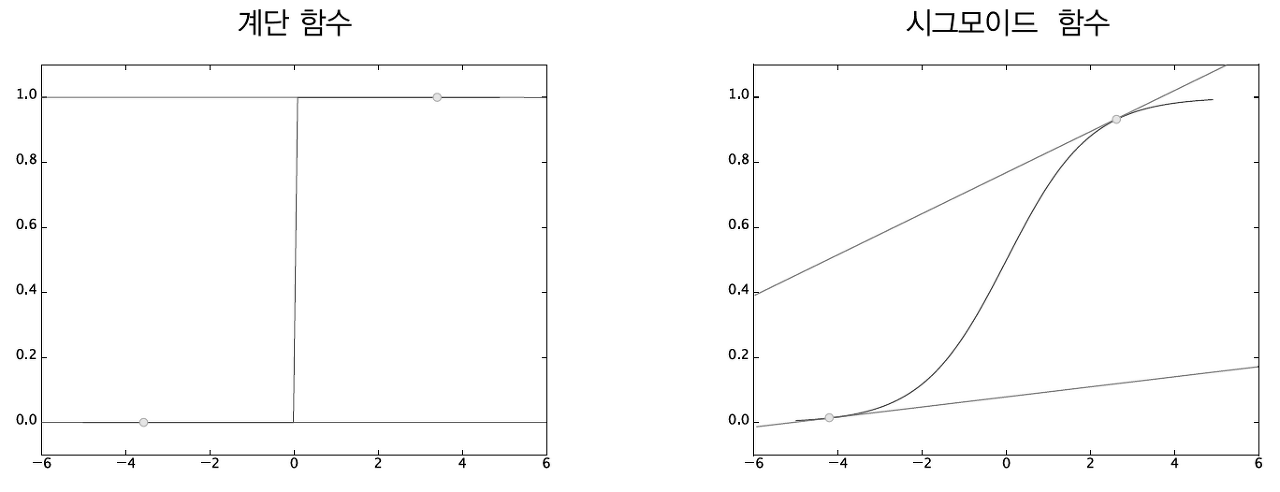

결론은, (헷갈릴까 봐) 정확도와 손실 함수의 변화 특성과 계단 함수 및 시그모이드 함수의 특성은 직접적인 관계가 없다. 그러나 이 둘은 학습 과정에서의 **연속성**과 **미분 가능성 (기울기가 0이 되지 않음)**이라는 개념에서 공통된 문제를 가지고 있다.
- 정확도는 불연속적으로 변하기 때문에 매개변수의 작은 변화에 반응하지 못하고, 학습을 진행하기 어렵다.
- 손실 함수는 연속적으로 변하기 때문에 매개변수의 작은 변화에도 민감하게 반응하고, 이를 통해 경사 하강법을 사용하여 학습을 진행할 수 있다.
- 계단 함수와 시그모이드 함수는 활성화 함수의 특성으로, 계단 함수는 비연속적이어서 학습에 어려움을 주고, 시그모이드는 연속적이어서 학습에 적합하다.



> 궁금한 점: 정확도와 손실 함수의 연속적이다, 비연속적이다 의 차이?

정확도의 변화 (불연속성의 예시)
- 예를 들어, 모델이 100개의 데이터 중 90개를 맞추고 있다고 하면 정확도는 0.9다.
  - 여기서 매개변수를 조금만 변화시켜도, 여전히 90개를 맞추면 정확도는 변하지 않고 0.9로 유지된다.
  - 하지만 매개변수를 더 변화시켜 91개를 맞추게 되면, 정확도가 갑자기 0.91로 증가한다.
  - 이처럼 정확도는 작은 변화에 반응하지 않다가, 임계점을 넘어서면 값이 갑자기 변하는 비연속적인 특성을 가진다.

손실 함수의 변화 (연속성의 예시)
- 손실 함수는 매개변수의 작은 변화에도 값이 조금씩 변한다.
- 예를 들어, 예측값이 0.8에서 0.82로 약간 바뀌면 손실 값도 이에 따라 0.04에서 0.036으로 서서히 변할 수 있다.
  - 여기서 중요한 점은, 매개변수의 작은 변화에 손실 함수 값도 부드럽고 연속적으로 변화한다는 것.
  - 손실 함수는 매개변수의 변화에 따라 값이 점진적으로 변하므로, 기울기를 계산하고 그 기울기를 따라 매개변수를 조정할 수 있다.

=> 정확도가 0.90 -> 0.905 이렇게 변화하는 것도 부드러운 거고, 그리고 손실 함수가 0.04에서 0.0003으로 변화하면 연속적이지 않게 된 거 아닌지?

## 4.3 수치 미분 (numerical differentiation)

경사법에서는 기울기(경사) 값을 기준으로 나아갈 방향을 정한다.

### 4.3.1 미분

미분은 한순간의 변화량을 표시한 것이며, 수식으로 표현하면 다음과 같다.

$$
\frac{df(x)}{dx} = \lim_{{h \to 0}} \frac{f(x + h) - f(x)}{h}
$$


미분의 좌변은 함수 $f(x)$가 변수 $x$의 작은 변화에 대해 얼마나 변하는지를 나타낸다. 이때, 시간의 작은 변화량 $h$를 한없이 0에 가깝게 한다는 의미로 $lim_{h->0}$를 사용하여 함수의 순간적인 변화율을 계산한다.

In [ ]:
# 나쁜 구현 예
def numerical_diff(f, x):
  h = 10e-50
  return (f(x+h) - f(x)) / h

위는 함수를 미분하는 계산을 곧이 곧대로 코드로 구현하였는데, 개선해야 할 점이 2개 존재한다.

첫 번째로,
- $h$에서 가급적 작은 값(0으로 무한히 가깝게)을 대입하고 싶었기에 10e-50을 이용했지만, 이는 반올림 오차(rounding error) 문제를 일으킨다.
- 이는 작은 값(가령 소수점 8자리 이하)이 생략되어 최종 계산 결과에 오차가 생기게 한다. 예시는 다음과 같다.

In [2]:
np.float32(1e-50)

0.0

참고, 1e-4 를 이용해 보도록 한다. 이는 수치 미분에서 오차와 정확성 사이의 균형을 잘 맞출 수 있는 값으로, 많은 실험적 경험을 통해 적절하다고 평가된 최적의 값으로 사용된다.

두 번째로,
- 함수 f의 차분(임의 두 점에서의 함수 값들의 차이)에 대한 것. (x+h와 x 사이의 함수 f의 차분)
- '미분'은 $x$ 위치의 함수 기울기(접선)에 해당하지만, 위의 구현에서의 미분은 $(x+h)$와 $x$ 사이의 기울기에 해당한다. 따라서 일치하지 않다.
- 이 차이는 $h$를 무한히 0으로 좁히는 것이 불가능해 생기는 한계다.

정리하자면,
- 이론적인 미분(접선의 기울기)은 $h$를 무한히 0에 가깝게 만드는 것이다.
- 하지만, 실제 계산에서는 $h$를 정확히 0으로 만들 수 없다.
- 그래서, 저것을 구현하지 못하므로 대체 방안으로 우리가 구하는 기울기는 $x$와 ${x+h}$ 사이의 기울기로, 실제 접선의 기울기와는 미세한 오차가 발생한다.
- 이때 오차는 $h$를 완전히 0으로 만들지 못하기 때문에 생기는 근사치 계산의 한계다.

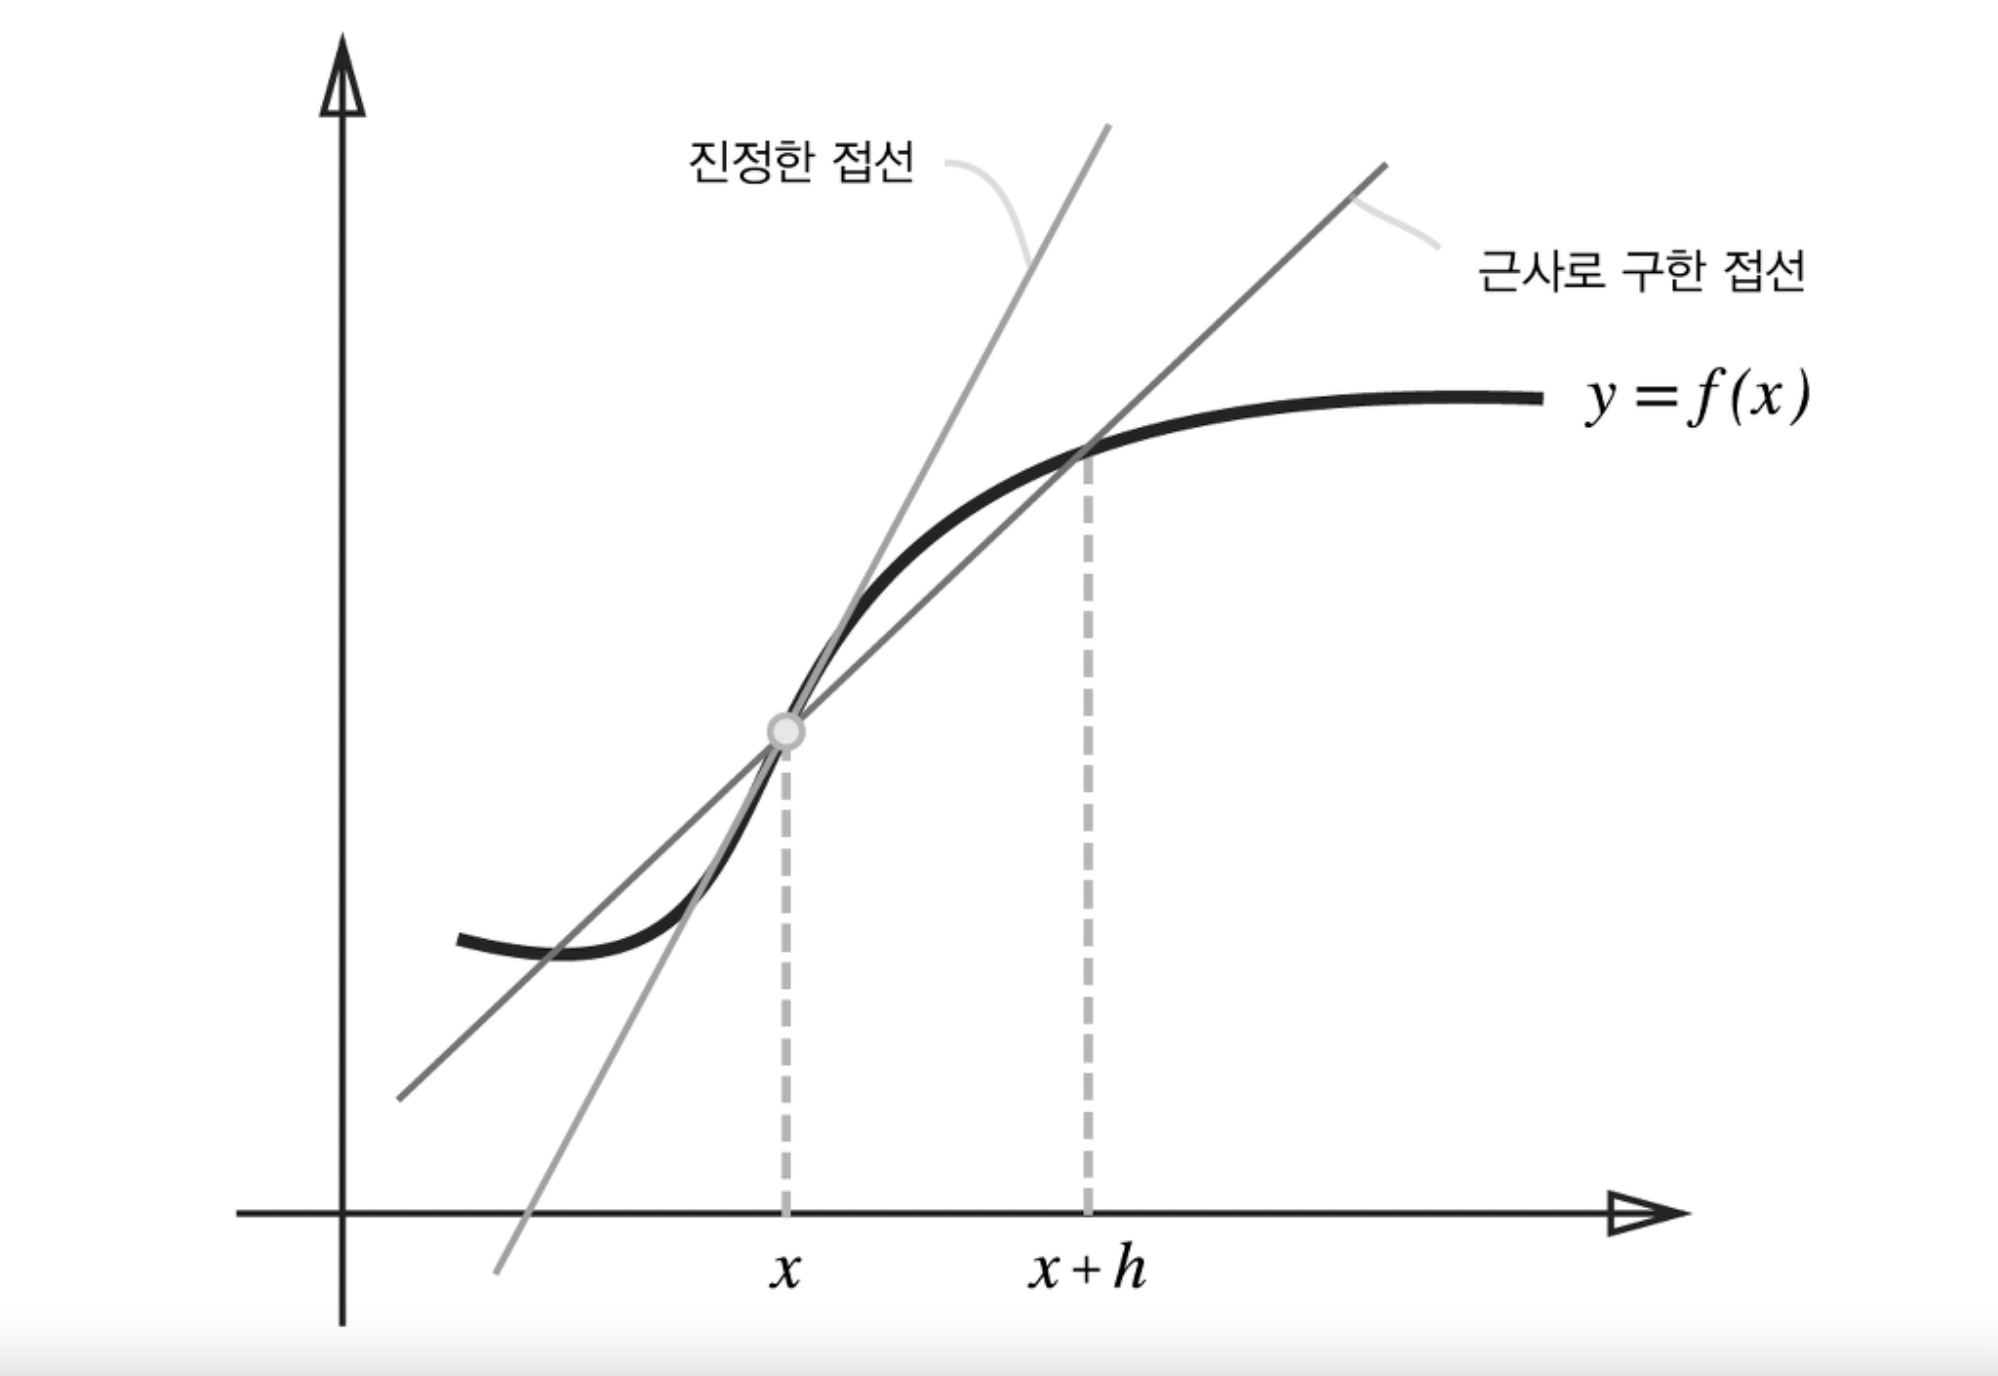

위와 같이 수치 미분에는 오차가 포함된다. 이 오차를 줄이기 위해 $(x+h)$와 $(x-h)$일 때의 함수 $f$의 차분을 계산하는 방법을 쓰기도 한다.

이 차분은 $x$를 중심으로 그 전후의 차분을 계산한다는 의미에서 **중심 차분** 혹은 **중앙 차분**이라 한다. (한편, $(x+h)$와 $x$의 차분은 **전방 차분**이라 함)

이제, 이상의 두 개선점을 적용해 수치 미분을 다시 구현해 본다.

In [6]:
def numerical_diff(f, x):
  h = 1e-4 # 0.0001 인데, 이는 수치 미분의 정확도를 최대화하면서도 계산 안정성을 유지하기 위해서이며, 1e-4가 적합하다 알려져 있음
  return (f(x+h) - f(x-h)) / (2*h)



> 해석적 미분과 수치 미분의 차이?
- 해석적(analytic) 미분
  - 수식을 전개하여 미분하는 것
  - 예를 들어, $f(x) = x^2 $의 해석적 미분은 $ f'(x) = 2x $
  - 과 같이 $x$의 값에 상관없이 정확한 기울기를 구할 수 있다.
- 수치 미분
  - 위처럼 아주 작은 차분으로 미분하는 것
  - 예를 들어, 같은 함수에 대해 $ x=1 $에서의 기울기를 구하고자 할 때, $ h = 1e-4 $ 로 설정하면 다음과 같이 계산할 수 있다:
  $$
f'(1) \approx \frac{f(1 + 1 \times 10^{-4}) - f(1)}{1 \times 10^{-4}}
$$
  - 이 값은 해석적 미분값 $ f'(1)=12 에 근사한 값을 얻을 수 있지만, 해석적 미분보다는 정확도가 떨어진다.


### 4.3.2 수치 미분의 예


수치 미분을 사용하여 간단한 함수를 미분한다.
$$
y = 0.01x^2 + 0.1x
$$

In [3]:
def function_1(x):
  return 0.01*x**2 + 0.1*x

<function matplotlib.pyplot.show(close=None, block=None)>

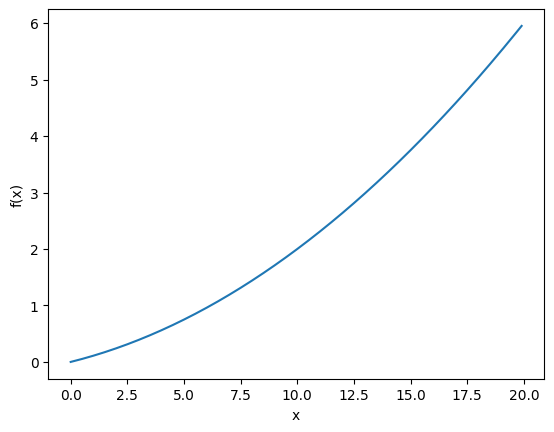

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1) # 0에서 20까지 0.1 간격의 배열 x를 만든다 (20은 미포함)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show

In [7]:
# x = 5 일 때와 10일 때, 이 함수의 미분을 계산해 보자.
numerical_diff(function_1, 5)

0.1999999999990898

In [8]:
numerical_diff(function_1, 10)

0.2999999999986347

이렇게 계산한 미분 값이 $x$에 대한 $f(x)$의 변화량, 즉 함수의 기울기다. 또한, 위 함수의 해석적 해는 $0.02x+0.1$이다.

따라서 $x$가 5와 10일 때의 '진정한 미분'은 차례로 0.2와 0.3이다. (오차가 매우 작은 것을 확인할 수 있음)

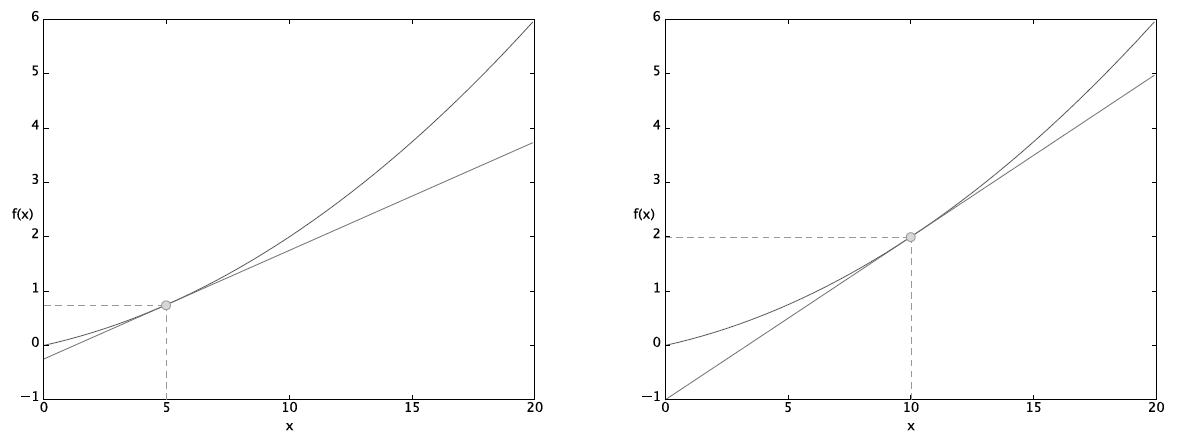

### 4.3.3 편미분

이번에는 인수들의 제곱 합을 계산하는 단순한 식이지만, 앞의 예와 달리 변수가 2개이다.

$$
f(x_0, x_1) = x_0^2+x_1^2
$$

In [9]:
def function_2(x): # x는 넘파이 배열이라 가정
  return x[0]**2 + x[1]**2
  # 또는 return np.sum(x**2)

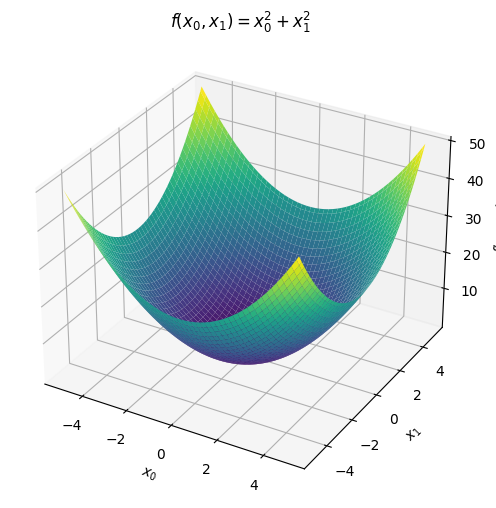

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# x0와 x1의 값을 생성합니다.
x0 = np.linspace(-5, 5, 100)  # -5에서 5 사이의 100개의 값
x1 = np.linspace(-5, 5, 100)  # -5에서 5 사이의 100개의 값

# x0와 x1의 그리드 생성
x0, x1 = np.meshgrid(x0, x1)

# 함수 f(x0, x1) 계산
f = x0**2 + x1**2

# 3D 그래프 생성
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# 그래프 그리기
ax.plot_surface(x0, x1, f, cmap='viridis', edgecolor='none')

# 그래프 설정
ax.set_title(r'$f(x_0, x_1) = x_0^2 + x_1^2$')
ax.set_xlabel(r'$x_0$')
ax.set_ylabel(r'$x_1$')
ax.set_zlabel(r'$f(x_0, x_1)$')

plt.show()


주어진 함수는 변수가 2개이므로, $x_0$과 $x_1$ 중 어느 변수에 대해 미분하는지를 구별해야 한다. 이렇게 변수가 여러 개인 함수에서 특정 변수에 대해 미분하는 것을 **편미분**이라 한다.

$$
\frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1}
$$


In [11]:
# 문제 1: x_0 = 3, x_1 = 4일 때, x_0 에 대한 편미분을 구하라.

def function_tmp1(x0):
  return x0**2 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [12]:
# 문제 2: x_0 = 3, x_1 = 4일 때, x_1 에 대한 편미분을 구하라.

def function_tmp2(x1):
  return 3.0**2.0 + x1**2

numerical_diff(function_tmp2, 4.0)

7.999999999999119

편미분은 한 변수를 선택해 그 변수에 따른 함수의 기울기를 구하는 방식이다. 이때 다른 변수들은 고정된 값으로 취급한다. 앞의 예에서는 목표 변수를 제외한 나머지 변수들을 특정 값으로 고정하여 새로운 함수를 정의한 후, 이 함수에 수치 미분을 적용하여 편미분을 계산했다.

## 4.4 기울기


앞 절의 예에서는 $x_0$과 $x_1$의 편미분을 변수별로 따로 계산했지만, 동시에 계산하고 싶다면 어떻게 할까?

$$
\nabla f = \left( \frac{\partial f}{\partial x_0}, \frac{\partial f}{\partial x_1} \right)
$$

양쪽의 편미분을 묶어, 위처럼 모든 변수의 편미분을 벡터 형태로 정리한 것을 **기울기(gradient)**라 한다.

In [15]:
def numerical_gradient(f, x):
  h = 1e-4
  grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성 (그 원소가 모두 0인 배열)

  for idx in range(x.size):
    tmp_val = x[idx]
    # f(x+h) 계산
    x[idx] = tmp_val + h
    fxh1 = f(x)

    # f(x-h) 계산
    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val # 값 복원

  return grad

In [16]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [18]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [17]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

위와 같은 결과를 얻었지만, 이 기울기라는 게 의미하는 것이 무엇일까? 그림으로 확인해 보자. (여기서는 기울기의 결과에 마이너스를 붙인 벡터를 그림)

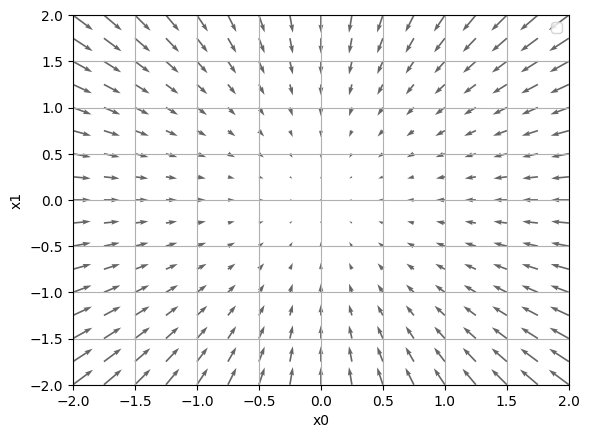

In [19]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성

    for idx in range(x.size):
        tmp_val = x[idx]

        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)

        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원

    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)

        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)

    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]) )

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

기울기 그림은 방향을 가진 벡터(화살표)로 그려지는데, 이 기울기는 각 지점에서 낮아지는 방향을 가리킨다. 더 정확히 말하자면 **기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향**이다.

예를 들어, 기울기는 산을 내려갈 때, 가장 빠르게 내려갈 수 있는 방향을 알려주는 화살표라는 느낌. 각 위치에서 함수(산의 높이)가 가장 빨리 줄어드는 방향을 가리킨다. 따라서 그쪽으로 이동하면, 함수의 값이 가장 크게 줄어드는 방향으로 가게 되는 것.

### 4.4.1 경사법(경사 하강법)

최적의 매개변수(가중치와 편향)는 학습 시에 찾아야 한다. 여기서 최적이란 손실 함수가 최솟값이 될 때의 매개변수 값인데, 일반적인 문제의 손실 함수는 매우 복잡해서 최솟값이 되는 지점을 찾기 어렵다. 이런 상황에서 기울기를 잘 이용해 함수의 최솟값(또는 가능한 한 작은 값)을 찾으려는 것이 **경사법**이다.

여기서 주의할 점은 각 지점에서 함수의 값을 낮추는 방안을 제시하는 지표가 기울기라는 것이다. 기울기가 가리키는 곳에 정말 함수의 최솟값이 있는지, 즉 그쪽에 정말로 나아갈 방향인지는 보장할 수 없다. 실제로 복잡한 함수에서는 기울기가 가리키는 방향에 최솟값이 없는 경우가 대부분이다.

기울기가 가리키는 방향이 반드시 최솟값으로 향하는 것은 아니며, 실제로 복잡한 함수에서는 기울기 방향에 최솟값이 없는 경우가 많다. 그러나 기울기 방향은 함수 값을 줄일 수 있는 단서를 제공하므로, 함수의 최솟값(또는 가능한 한 작은 값)을 찾기 위해서는 기울기 정보를 참고하여 나아갈 방향을 결정해야 한다.



> 책에 나와 있는 문장에 대한 정리

기울어진 방향이 꼭 최솟값을 가리키는 것은 아니나, 그 방향으로 가야 함수의 값을 줄일 수 있다.

-> 경사 하강법은 **"가능한 한 함수 값을 줄이는 방향"**으로 나아가는 알고리즘이지, 항상 최솟값으로 가는 것을 보장하지는 않음.

참고로, 함수가 극솟값, 최솟값, 또 안장점(saddle point)이 되는 장소에서는 기울기가 0이다.

- 극솟값: 국소적인 최솟값이란 의미. 즉, 한정된 범위에서의 최솟값인 점
- 안장점: 보는 시점에 따라 극댓값, 극솟값이 되는 점
- 경사법은 기울기가 0인 장소를 찾지만 그것이 반드시 최솟값이라고는 할 수 없다. (극솟값이나 안장점일 가능성이 있음)
- 또한, 복잡하고 찌그러진 모양의 함수라면 (대부분) 평평한 곳으로 파고들면서 고원이라 하는 학습이 진행되지 않는 정체기에 빠질 수 있다.

❓

> 질문 1: 왜 학습 과정에서는 기울기가 0이 되지 않게 유지해야 하나요?

답변: 학습 과정에서는 손실 함수를 줄이기 위해 매개변수를 조정하는데, 이때 기울기(gradient)를 이용합니다. 기울기가 0이 되지 않는다는 것은 손실 함수의 값이 여전히 줄어들 수 있는 여지가 있다는 뜻입니다. 기울기가 0이 되지 않으면, 손실 함수를 줄일 수 있는 방향이 존재하므로, 학습을 계속 진행할 수 있습니다.


> 질문 2: 왜 학습의 목표는 기울기가 0인 지점을 찾는 것인가요?

답변: 학습의 목표는 손실 함수의 값이 최소가 되는 지점, 즉 기울기가 0이 되는 지점을 찾는 것입니다. 기울기가 0인 지점에서는 손실 함수의 값이 더 이상 줄어들지 않기 때문에, 이 지점이 최적의 매개변수(가중치와 편향)를 나타냅니다. 따라서, 기울기가 0인 지점에 도달하면 학습이 완료된 상태입니다.


> 질문 3: 학습 과정에서 기울기가 0이 되지 않도록 하면서도, 기울기가 0인 지점을 찾으려는 것이 모순 아닌가요?

답변: 이 표현이 모순처럼 들릴 수 있지만, 사실 학습 과정과 학습의 목표를 설명하는 다른 측면입니다. 학습 과정에서는 기울기 정보를 이용해 손실 함수를 계속 줄여나가야 하므로 기울기가 0이 되지 않도록 유지하며 학습을 진행합니다. 그러나 학습의 최종 목표는 손실 함수가 최솟값에 도달하는, 즉 기울기가 0이 되는 지점을 찾는 것입니다. 학습 중에는 기울기를 사용해 손실 함수를 줄여나가고, 최종적으로 기울기가 0이 되는 최솟값 지점에 도달하려는 것입니다.

> 질문 4: 학습 중 기울기가 0이 되면 어떻게 되나요?

답변: 학습 중에 기울기가 0이 되면, 매개변수를 어떻게 조정해도 손실 함수의 값이 더 이상 변하지 않기 때문에 학습이 멈추게 됩니다. 기울기가 0이라는 것은 손실 함수가 더 이상 줄어들지 않는 상태를 의미하므로, 학습이 종료되거나, 기울기 소실 문제(Gradient Vanishing)로 인해 학습이 더 이상 진행되지 않을 수 있습니다.

> 질문 5: 결국, 학습 과정과 학습 목표의 차이는 무엇인가요?

답변: 학습 과정에서는 기울기가 0이 되지 않도록 유지하며, 손실 함수를 줄이기 위해 매개변수를 조정해 나갑니다. 학습의 목표는 손실 함수를 최소화하여 기울기가 0이 되는 지점, 즉 최적의 매개변수를 찾는 것입니다. 이 둘은 학습 중의 상태(기울기 0이 되지 않게 유지)와 학습 완료 후의 상태(기울기 0인 지점)를 설명하는 서로 다른 측면입니다.

즉, 경사법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동한다. 이동한 곳에서도 마찬가지로 기울기를 구하고, 또 기울어진 방향으로 나아가기를 반복한다. 이렇게 하여 함수의 값을 점차 줄이는 것이 **경사법(gradient method)**이다.

참고로, 경사법은 두 가지로 나뉘는데, 손실 함수의 부호를 반전시키면 같은 것이니 본질적으로 중요하지는 않지만, 경사하강법이 많이 쓰인다.
- 경사하강법(gradient descent method): 최솟값을 찾음
- 경사상승법(gradient ascent method): 최댓값을 찾음

경사법을 수식으로 나타내면 다음과 같다:

$$
x_0 = x_0 - \eta \frac{\partial f}{\partial x_0}
$$

$$
x_1 = x_1 - \eta \frac{\partial f}{\partial x_1}
$$

- $\eta$ 기호(eta): 갱신하는 양, 즉 **학습률(learning rate)** 이다. 한 번의 학습으로 얼마만큼 학습해야 할지, 즉 매개변수 값을 얼마나 갱신하느냐를 정하는 것.

위의 식은 1회에 해당하는 갱신이며, 이 단계를 여러 번 반복하며 서서히 함수의 값을 줄이는 것이다. 또한, 여기에는 변수가 2개인 경우지만 변수의 수가 늘어도 같은 식(각 변수의 편미분 값)으로 갱신하게 된다.

그리고, 학습률 값은 0.01이나 0.001 등 미리 특정 값으로 정해두어야 하는데, 일반적으로 이 학습률 값을 변경하면서 올바르게 학습하고 있는지를 확인하며 진행한다.

In [24]:
# 경사 하강법 구현
def gradient_descent(f, init_x, lr=0.01, step_num=100): # 최적화하려는 함수, 초깃값, 학습률, 경사법에 따른 반복 횟수
  x = init_x

  for i in range(step_num):
    grad = numerical_gradient(f, x)
    x -= lr * grad

In [25]:
# 문제: 경사법으로 f(x_0, x_1) = x_0^2 + x_1^2 의 최솟값을 구하라.
def function_2(x):
  return x[0]**2 + x[1]**2

In [33]:
init_x = np.array([-3.0, 4.0]) # 초깃값 설정

In [34]:
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100) # array([ -6.11110793e-10, 8.14814391e-10]) 으로, 거의 (0,0)에 가까운 값

(array([-6.11110793e-10,  8.14814391e-10]),
 array([[-3.00000000e+00,  4.00000000e+00],
        [-2.40000000e+00,  3.20000000e+00],
        [-1.92000000e+00,  2.56000000e+00],
        [-1.53600000e+00,  2.04800000e+00],
        [-1.22880000e+00,  1.63840000e+00],
        [-9.83040000e-01,  1.31072000e+00],
        [-7.86432000e-01,  1.04857600e+00],
        [-6.29145600e-01,  8.38860800e-01],
        [-5.03316480e-01,  6.71088640e-01],
        [-4.02653184e-01,  5.36870912e-01],
        [-3.22122547e-01,  4.29496730e-01],
        [-2.57698038e-01,  3.43597384e-01],
        [-2.06158430e-01,  2.74877907e-01],
        [-1.64926744e-01,  2.19902326e-01],
        [-1.31941395e-01,  1.75921860e-01],
        [-1.05553116e-01,  1.40737488e-01],
        [-8.44424930e-02,  1.12589991e-01],
        [-6.75539944e-02,  9.00719925e-02],
        [-5.40431955e-02,  7.20575940e-02],
        [-4.32345564e-02,  5.76460752e-02],
        [-3.45876451e-02,  4.61168602e-02],
        [-2.76701161e-02,  3.689

경사법을 이용한 갱신 과정을 그림으로 나타내면 다음과 같다. 값이 가장 낮은 장소인 원점에 점차 가까워지는 것을 볼 수 있다.

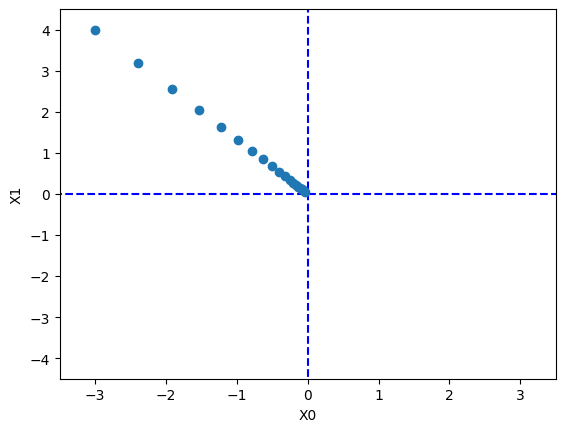

In [30]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

학습률이 너무 크거나 작으면 좋은 결과를 얻을 수 없다. 이를 확인해 보자.

In [31]:
# 학습률이 너무 큰 예: 1r=10.0
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

(array([-2.58983747e+13, -1.29524862e+12]),
 array([[-3.00000000e+00,  4.00000000e+00],
        [ 5.70000000e+01, -7.60000000e+01],
        [-1.08300000e+03,  1.44400000e+03],
        [ 2.05770000e+04, -2.74360000e+04],
        [-3.90963008e+05,  5.21284002e+05],
        [ 7.42829664e+06, -9.90439654e+06],
        [-1.41137328e+08,  1.88183103e+08],
        [ 2.68126267e+09, -3.57501690e+09],
        [-5.09763373e+10,  6.79001831e+10],
        [ 9.45170863e+11, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.295

In [32]:
# 학습률이 너무 작은 예: 1r=1e-10
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

(array([-2.99999994,  3.99999992]),
 array([[-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  3.99999999],
        [-3.        ,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999998,  3.99999998],
        [-2.99999998,  3.999

위와 같이 학습률이 너무 크면 큰 값으로 발산해버리고, 너무 작으면 거의 갱신되지 않은 채로 끝난다. 이를 통해 학습률을 적절히 설정하는 일이 중요함을 알 수 있다.

참고로, 학습률 같은 매개변수를 하이퍼파라미터(hyper parameter, 초매개변수)라 한다. 이는 가중치와 편향 같은 훈련 데이터와 학습 알고리즘에 의해 '자동'으로 획득되는 신경망 매개변수와는 성질이 다르다. 하이퍼파라미터는 사람이 직접 설정해야 하는 매개변수이며, 여러 후보 값 중 시험을 통해 가장 잘 학습하는 값을 찾는 과정을 거쳐야 한다.

### 4.2.2 신경망에서의 기울기
- 가중치 매개변수에 대한 손실 함수의 기울기를 말한다.

예를 들어, 형상이 2x3, 가중치가 $W$, 손실 함수가 $L$인 신경망의 수식은 다음과 같다. (가중치, 경사. 경사의 각 원소는 각각의 원소에 관한 편미분.)

- $\frac{\partial L}{\partial w_{11}}$은 $w_{11}$을 조금 변경했을 때 손실 함수 $L$이 얼마나 변화하느냐를 나타낸다.

$$
W = \begin{bmatrix}
w_{11} & w_{12} & w_{13} \\
w_{21} & w_{22} & w_{23}
\end{bmatrix}
$$

$$
\nabla_W L = \begin{bmatrix}
\frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{12}} & \frac{\partial L}{\partial w_{13}} \\
\frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{22}} & \frac{\partial L}{\partial w_{23}}
\end{bmatrix}
$$


In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x): # 예측 수행
        return np.dot(x, self.W)

    def loss(self, x, t): # 손실 함수 값 구함 (입력 데이터 x, 정답 레이블 t)
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [ ]:
net = simpleNet()
print(net.W) # 가중치 매개변수
# [[ 0.47355232 0.9977393 0.84668094]
#  [ 0.85557411 0.03563661 0.69422093 ]]

In [ ]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)
# [ 1.05414809 0.63071653 1.1328074]

In [ ]:
np.argmax(p) # 최댓값의 인덱스
# 2

In [ ]:
t = np.array([0, 0, 1]) # 정답 레이블
net.loss(x, t)
# 0.92806853663411326

이어서, 기울기를 구하면 다음과 같다:
- $\frac{\partial L}{\partial w_{11}}$는 대략 0.2인데, 이는 $w_{11}$를 $h$만큼 늘리면 손실 함수의 값은 $0.2h$만큼 증가한다는 의미.
  - 손실 함수를 줄이기 위해서는 음의 방향으로 갱신
- 마찬가지로, $\frac{\partial L}{\partial w_{23}}$는 대략 -0.5라, $\frac{\partial L}{\partial w_{23}}$를 $h$만큼 늘리면 손실 함수의 값은 $0.5h$만큼 감소하는 것.
  - 손실 함수를 줄이기 위해서는 양의 방향으로 갱신


> 손실 함수를 줄이기 위해서는 반드시 부호의 반대 방향으로 갱신하는 것으로 이해하면 되는 건지?

기울기의 부호는 손실 함수가 증가하는 방향을 나타낸다. 따라서, 손실 함수를 줄이려면 기울기의 반대 방향으로 매개변수를 갱신해야 한다.


> 왜 "매개변수 $w_{11}$"와 "기울기 $\frac{\partial L}{\partial w_{23}}$"를 각각 $h$만큼 증가시키는 것처럼 표현한 건지?


원래 의도는 매개변수 $w_{11}$와 $w_{23}$를 $h$만큼 변화시켰을 때 손실 함수 $L$이 얼마나 변하는지를 설명하는 것이었다. 첫 번째 문장은 올바르지만, 두 번째 문장에서는 기울기 $\frac{\partial L}{\partial w_{23}}$ 를 늘리는 것이 아닌 $w_{23}$으로 바꿔야 한다.




그리고, 한 번에 갱신되는 양에는 $\frac{\partial L}{\partial w_{23}}$이 $w_{11}$보다 크게 기여한다는 사실도 알 수 있다.

In [ ]:
def f(W):
  return net.loss(x,t)

In [ ]:
dW = numerical_gradient(f, net.W)
print(dW)
# [[ 0.21924763 0.14356247 -0.36281009]
#  [ 0.32887144 0.2153437 -0.54421514 ]]

이 구현에서는 새로운 함수를 정의하는 데 'def f(x):...' 문법을 썼는데, 파이썬에서는 람다(lambda) 기법을 쓰면 더 편하다.

In [ ]:
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

## 4.5 학습 알고리즘 구현하기

신경망 학습의 절차는 다음과 같다:

전체
- 신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라 한다. 신경망 학습은 다음과 같이 4단계로 수행한다.

1단계 - 미니배치
- 훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실 함수 값을 줄이는 것이 목표인다.

2단계 - 기울기 산출
- 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시한다.

3단계 - 매개변수 갱신
- 가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.

4단계 - 반복
- 1~3단계를 반복한다.

이것이 신경망 학습이 이뤄지는 순서이며, 이는 경사 하강법으로 매개변수를 갱신하는 방법이며, 이때 데이터를 미니배치로 (확률적으로) 무작위로 선정하기 때문에 **확률적 경사 하강법(stochastic gradient descent, SGD)**라 부른다.

### 4.5.1 2층 신경망 클래스 구현하기

실제로 손글씨 숫자를 학습하는 신경망을 구현해 보자. 여기서는 2층 신경망(은닉층이 1개인 네트워크)을 대상으로 MNIST 데이터셋을 사용하여 학습을 수행한다.

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

In [ ]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape) # (784, 100)
print(net.params['b1'].shape) # (100, )
print(net.params['W2'].shape) # (100, 10)
print(net.params['b2'].shape) # (10, )

- params 변수에는 이 신경망에 필요한 매개변수가 모두 저장됨
- 이 저장된 가중치 매개변수가 예측 처리(순방향 처리)에서 사용됨

In [ ]:
# 예측 처리
x = np.random.rand(100, 784) # 더미 입력 데이터(100장 분량)
y = net.predict(x)

- grads 변수에는 params 변수에 대응하는 각 매개변수의 기울기가 저장됨

In [ ]:
x = np.random.rand(100, 784) # 더미 입력 데이터(100장 분량)
t = np.random.rand(100, 10) # 더미 정답 데이터(100장 분량)

grads = net.numerical_gradient(x, t) # 기울기 계산

grads['W1'].shape #(784, 100)
grads['b1'].shape #(100,)
grads['W2'].shape #(100, 10)
grads['b2'].shape #(10,)

즉, 손글씨 숫자 인식에서는
- input_size: 크기가 28x28인 입력 이미지가 총 784개
- output_size: 출력은 10개

참고로, numerical_gradient(self, x, t)는 수치 미분 방식으로 매개변수의 기울기를 계산하는데, 신경망 학습은 시간이 오래 걸리기에 시간을 절약하려면 gradient(self, x, t)인 오차역전파법 메서드를 사용하는 것이 좋다 -> 다음 장에서 구현

### 4.5.2 미니배치 학습 구현하기
- 미니배치 학습이란 훈련 데이터 중 일부를 무작위로 꺼내고(미니배치), 그 미니배치에 대해서 경사법으로 매개변수를 갱신한다.

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

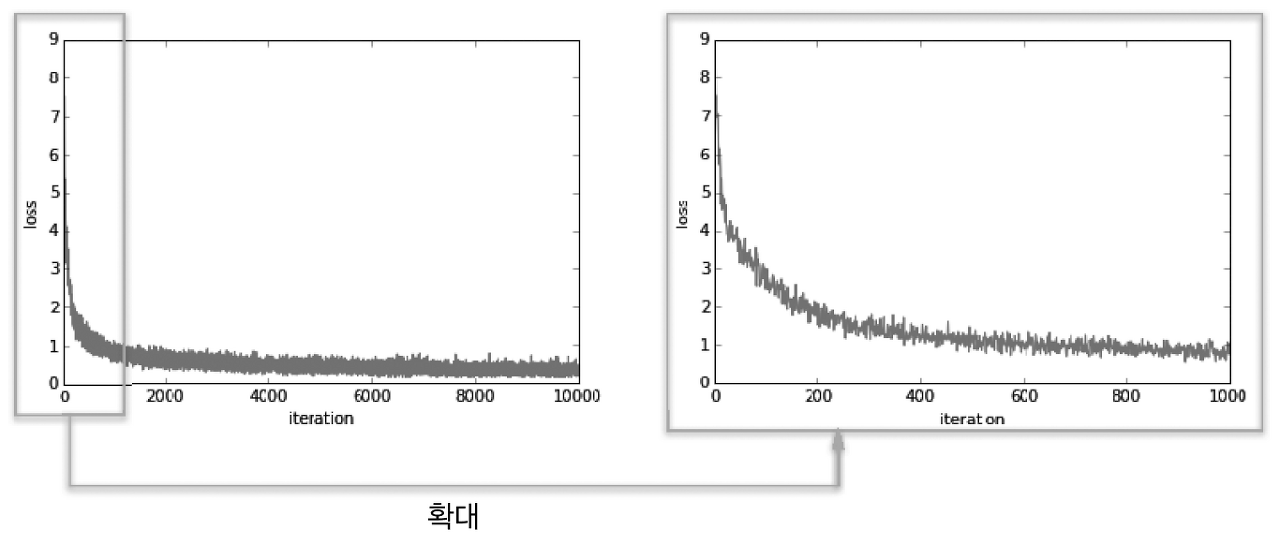

- 미니배치 크기를 100으로 설정. 즉, 매번 60,000개의 훈련 데이터에서 임의로 100개의 데이터(이미지 데이터와 정답 레이블 데이터)를 추려냄
- 그 100개의 미니배치를 대상으로 SGD를 수행해 매개변수 갱신
- 경사법에 의한 갱신 횟수(반복 횟수)를 10,000번으로 설정하고, 갱신할 때마다 훈련 데이터에 대한 손실 함수를 계산하고, 그 값을 배열에 추가한다.

학습 횟수가 늘어가며 손실 함수의 값이 줄어드는 것은 학습이 잘 되고 있다는 의미로, 신경망의 가중치 매개변수가 서서히 데이터에 적응하고 있음을 의미한다. (신경망이 학습하고 있다)

즉, 데이터를 반복하여 학습함으로써 최적 가중치 매개변수로 서서히 다가가고 있는 것.

### 4.5.3 시험 데이터로 평가하기

위의 훈련 데이터의 미니배치에 대한 손실 함수 값이 서서히 내려가는 것을 확인했다면, 이는 신경망이 잘 학습하고 있다는 방증이지만, 이 결과만으로는 다른 데이터셋에도 비슷한 실력을 발휘할지는 확실하지 않다.

신경망 학습에서는 훈련 데이터 외의 데이터를 올바르게 인식하는지, 즉 '**오버피팅**'을 일으키지 않는지 확인해야 한다. 이는 예를 들어, 훈련 데이터에 포함된 이미지만 제대로 구분하고, 그렇지 않은 이미지는 식별할 수 없다는 뜻이다.

**신경망 학습의 원래 목표는 범용적인 능력을 익히는 것**이다. 이를 위해 여기서는 1에폭별로 훈련 데이터와 시험 데이터에 대한 정확도를 기록한다. (앞의 코드에서 조금만 수정함)

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)

    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

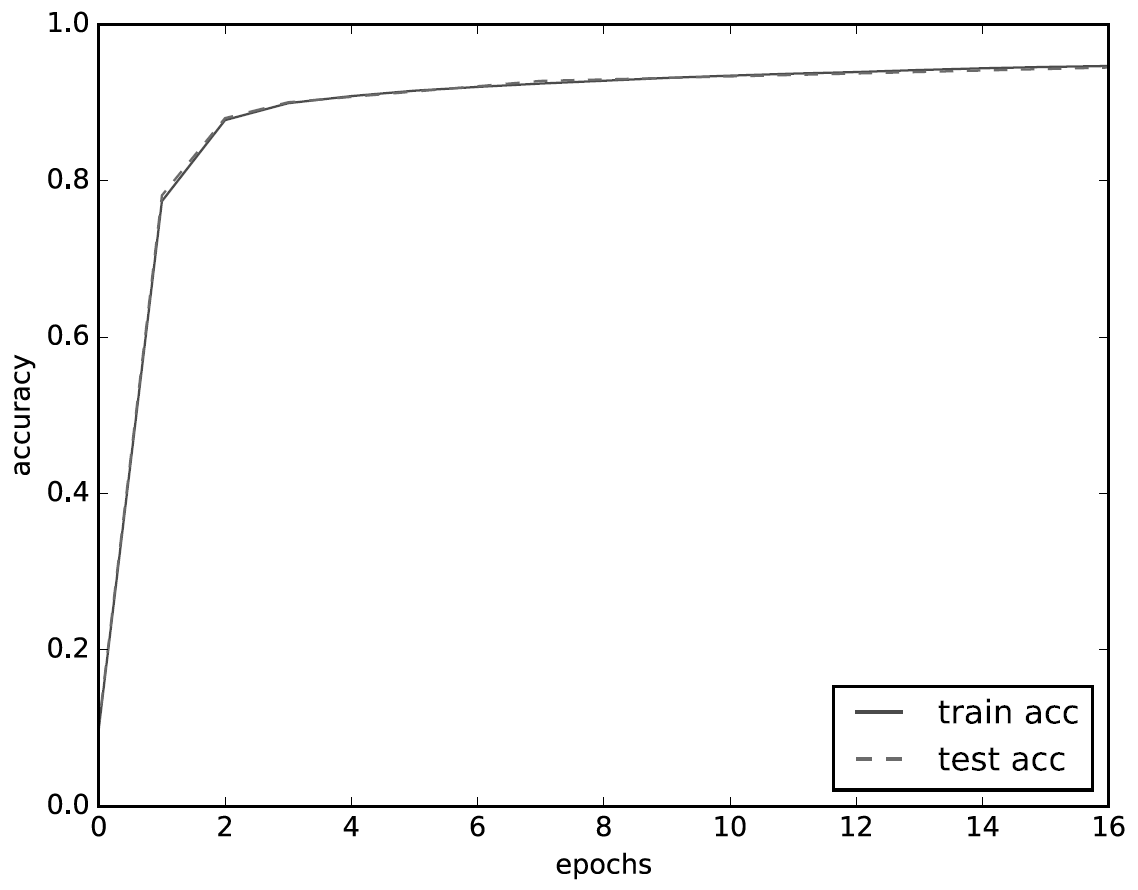

에폭이 진행될수록(학습이 진행될수록) 훈련 데이터와 시험 데이터를 사용하고 평가한 정확도가 모두 좋아지고 있다. 또, 두 정확도에는 차이가 없음을 알 수 있으며, 즉 이번 학습에서는 오버피팅이 일어나지 않음을 알 수 있다.

## 4.6 정리

- 기계학습에서 사용하는 데이터셋은 훈련 데이터와 시험 데이터로 나눠 사용한다.
- 훈련 데이터로 학습한 모델의 범용 능력을 시험 데이터로 평가한다.
- 신경망 학습은 손실 함수를 지표로, 손실 함수의 값이 작아지는 방향으로 가중치 매개변수를 갱신한다.
- 가중치 매개변수를 갱신할 때는 가중치 매개변수의 기울기를 이용하고, 기울어진 방향으로 가중치의 값을 갱신하는 작업을 반복한다.
- 아주 작은 값을 주었을 때의 차분으로 미분하는 것을 수치 미분이라 한다.
- 수치 미분을 이용해 가중치 매개변수의 기울기를 구할 수 있다.
- 수치 미분을 이용한 계싼에는 시간이 걸리지만, 그 구현은 간단하다. 한편, 다음 장에서 구현하는 (다소 복잡한) 오차역전파법은 기울기를 고속으로 구할 수 있다.